In [1]:
import torch

In [2]:
torch.__version__

'2.3.0'

In [5]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [6]:
x = torch.rand(5, 3).to(device)

In [7]:
x

tensor([[0.9843, 0.7592, 0.2892],
        [0.6643, 0.8915, 0.3509],
        [0.1993, 0.0820, 0.1898],
        [0.3453, 0.1750, 0.6430],
        [0.9031, 0.2291, 0.1446]], device='cuda:0')

# K-Means

In [8]:
import matplotlib.pyplot as plt

In [13]:
N = 100
x1 = torch.randn(N, 2)
x2 = torch.randn(N, 2) + torch.Tensor([3, 3])
x3 = torch.randn(N, 2) + torch.Tensor([-3, 3])

In [16]:
X = torch.cat([x1, x2, x3], dim=0)
print(X.shape)

torch.Size([300, 2])


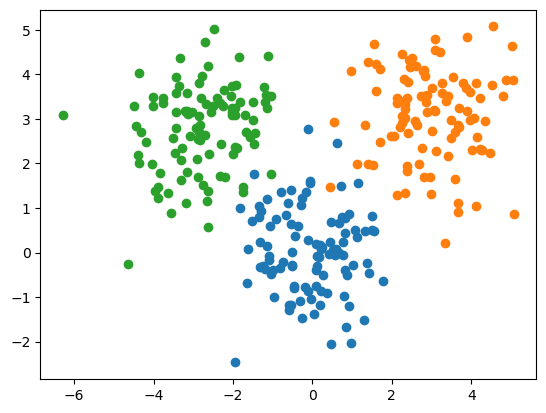

In [18]:
for i in range(3):
    plt.scatter(X[i*N:(i+1)*N, 0], X[i*N:(i+1)*N, 1])
plt.show()

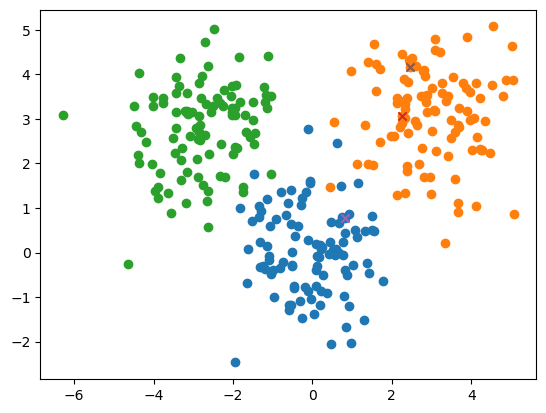

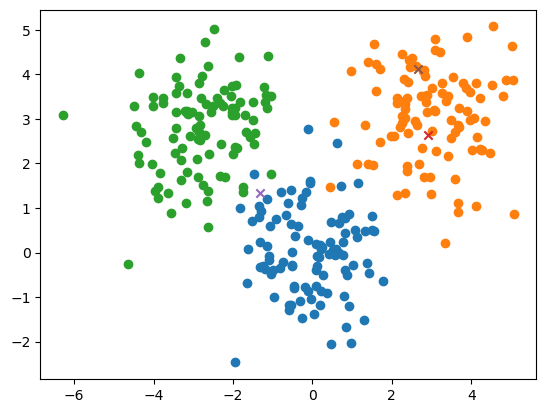

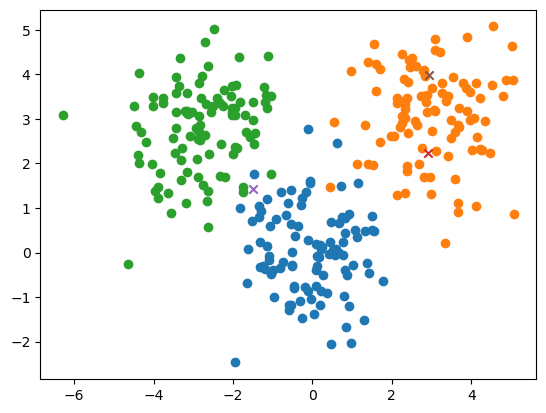

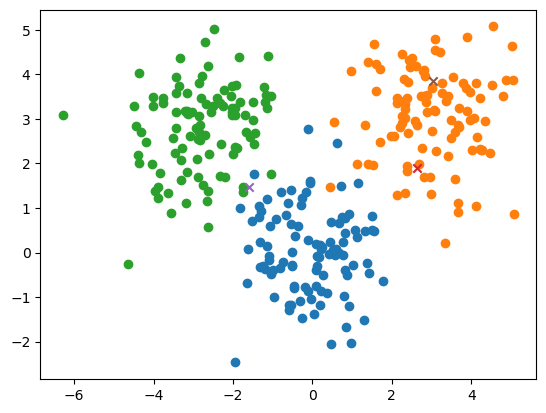

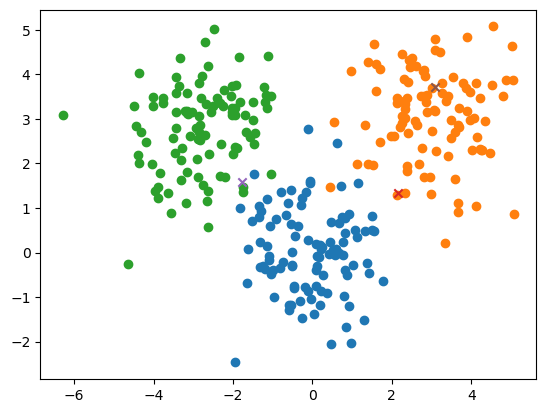

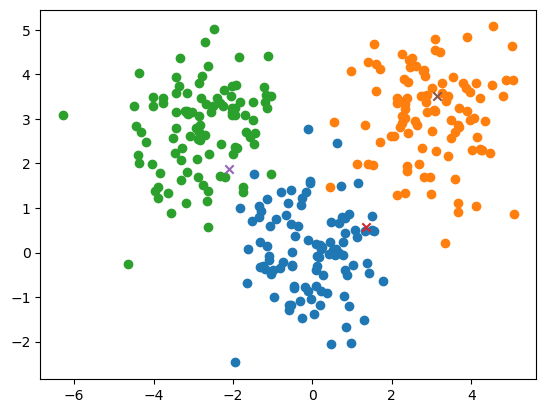

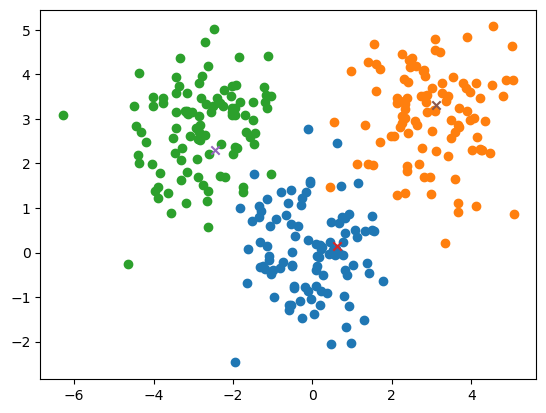

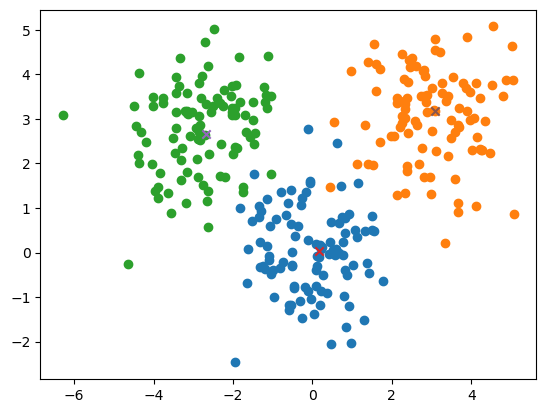

In [40]:
K = 3
centroids = X[torch.randperm(len(X))[:K]]
while True:
    D = torch.cdist(X, centroids)
    clusters = torch.argmin(D, dim=1)
    for i in range(3):
        plt.scatter(X[i*N:(i+1)*N, 0], X[i*N:(i+1)*N, 1])
    old_centroids = centroids.clone()
    for k in range(K):
        plt.scatter(centroids[k, 0], centroids[k, 1], marker='x')
        centroids[k] = X[clusters == k].mean(dim=0)
    change = torch.sum((centroids - old_centroids) ** 2)
    if change < 0.1:
        break
    plt.show()

In [59]:
import time
device = 'cuda'

N = 100000
x1 = torch.randn(N, 2)
x2 = torch.randn(N, 2) + torch.Tensor([3, 3])
x3 = torch.randn(N, 2) + torch.Tensor([-3, 3])
X = torch.cat([x1, x2, x3], dim=0).to(device)

t1 = time.time()
K = 3
centroids = X[torch.randperm(len(X))[:K]]
for _ in range(100):
    D = torch.cdist(X, centroids)
    clusters = torch.argmin(D, dim=1)
    for k in range(K):
        centroids[k] = X[clusters == k].mean(dim=0)
print(time.time() - t1)

0.35938453674316406
